In [1]:
# jzelAdmin2006's standard import (potentially, not everything is needed theoretically)
%matplotlib inline
from pathlib import Path
import math
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from collections import Counter
import missingno as msno
import seaborn as sns
import re
from pandas.core.reshape.tile import to_datetime
from decimal import Decimal

df = pd.read_csv('https://drive.google.com/uc?id=1RmD9hHQgu9PGLYj8BZ5HenAKRLV7fu-S&export=download')

In [2]:
review_charamounts = []
for index, row in df.iterrows():
  review_charamounts.append(len(row.Review))

In [3]:
df = df.assign(review_charamounts=review_charamounts)

In [4]:
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply,review_charamounts
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,112
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,86
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,106
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,47
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,100
...,...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN,279
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN,263
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN,493
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN,272


In [5]:
combinatorialValues = []
for index, row in df.iterrows():
  print(index)
  combinatorialValueTotal = Decimal(math.factorial(row.review_charamounts))
  most_common_characters = Counter(list("".join(df['Review'].iloc[index]))).most_common(len(df['Review'].iloc[index]))
  df_most_common_characters = pd.DataFrame (most_common_characters, columns = ['character', 'apparitions'])
  for index2, row2 in df_most_common_characters.iterrows():
    combinatorialValueTotal = Decimal(combinatorialValueTotal) / Decimal(math.factorial(row2.apparitions))
  combinatorialValues.append(combinatorialValueTotal)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
56594
56595
56596
56597
56598
56599
56600
56601
56602
56603
56604
56605
56606
56607
56608
56609
56610
56611
56612
56613
56614
56615
56616
56617
56618
56619
56620
56621
56622
56623
56624
56625
56626
56627
56628
56629
56630
56631
56632
56633
56634
56635
56636
56637
56638
56639
56640
56641
56642
56643
56644
56645
56646
56647
56648
56649
56650
56651
56652
56653
56654
56655
56656
56657
56658
56659
56660
56661
56662
56663
56664
56665
56666
56667
56668
56669
56670
56671
56672
56673
56674
56675
56676
56677
56678
56679
56680
56681
56682
56683
56684
56685
56686
56687
56688
56689
56690
56691
56692
56693
56694
56695
56696
56697
56698
56699
56700
56701
56702
56703
56704
56705
56706
56707
56708
56709
56710
56711
56712
56713
56714
56715
56716
56717
56718
56719
56720
56721
56722
56723
56724
56725
56726
56727
56728
56729
56730
56731
56732
56733
56734
56735
56736
56737
56738
56739
56740
56741
56742
56743
56744
56745
56746
56747
56748
567

In [6]:
df=df.assign(combinatorialValues=combinatorialValues)

In [7]:
df=df[['review_charamounts', 'combinatorialValues']]

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:2450: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


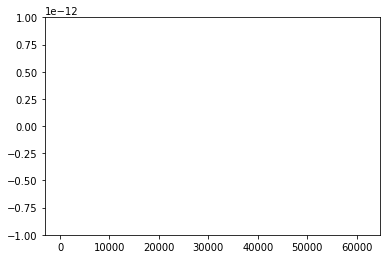

In [8]:
plt.plot(df)

In [9]:
df

,review_charamounts,combinatorialValues
0,112,3.543322795391215588639873312E+126
1,86,2.028827809224333736362031825E+89
2,106,3.97853021149087779402612797E+120
3,47,4.475260432405988723037928755E+45
4,100,3.087520344942402002428487255E+112
...,...,...
61589,279,2.472068086155193500751558162E+340
61590,263,1.725761365518483094380334228E+317
61591,493,3.044371274496102169666333696E+595
61592,272,3.078626233035911332327914115E+317


In [10]:
numbersOfPlaces = []
for index, row in df.iterrows():
  numberOfPlaces = 0
  combinatorialValueStr = str(row.combinatorialValues)
  if combinatorialValueStr.count("E+") == 1:
    numberOfPlaces = int(combinatorialValueStr.split("E+")[1])
    if combinatorialValueStr[0] != '0':
      numberOfPlaces += 1
  else:
    numberOfPlaces = len(combinatorialValueStr)
  numbersOfPlaces.append(numberOfPlaces)

In [11]:
df=df.assign(combinatorialValueNumbersOfPlaces=numbersOfPlaces)

In [12]:
df=df.drop(columns=['combinatorialValues'])

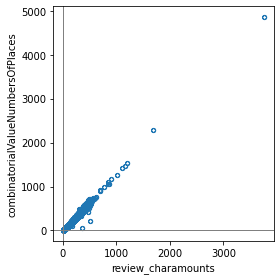

In [13]:
ax = df.plot.scatter(x='review_charamounts', y='combinatorialValueNumbersOfPlaces', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('review_charamounts')
ax.set_ylabel('combinatorialValueNumbersOfPlaces')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()